# Introduction To Machine Learning: Supervised Learning - Final Project

### Introduction


#### Project Topic
For my final project for DTSA 5509, I've decided to utilize an infamous dataset from Kaggle, to predict whether or not a given passenger on the Titanic survived its sinking in 1912.

Thus, this project is a *Binary Classification Task* with *Supervised learning*. Binary classification involves assigning each instance to one of two possible categories, which in this case are simply *survived* or *did not survived*.

Moreover the *goal* of this project is to build a model (or models!) that can predict a passenger's survival based on the data, but I also aim to achieve the following objectives where necessary:
1. Complete Exploratory Data Analysis (EDA)
2. Feature Engineering (if possible)
3. Building a model using appropriate machine learning algorithms
4. Evaluating results of the model
5. Effectively Communicating Results

### Data
The data used for this project is part of an infamous dataset found on Kaggle (https://www.kaggle.com/), a data science competition platform and online community that hosts a plethora of datasets for the purposes of education, application and practice.

The data set we'll be using is called the *Titanic - Machine Learning From Disaster* dataset.
This data is liscenced to use for Academic and Non-Commercial use by Kaggle (https://opendatacommons.org/licenses/dbcl/1-0/).

APA Citation: 
* Kaggle. (2012, September 28). Titanic - machine learning from disaster. https://www.kaggle.com/competitions/titanic/data?select=train.csv *

#### The data has the following size:
- Data set size = 61.19kB
- 12 columns, 891 rows/observations.
- One table (i.e. NOT multi-tabular)

#### Attribute Information
| Attribute name | Description                                                                                                                                         | Key                                                                         | Data Type |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------|-----------|
| survival       | Whether or not the passenger survived                                                                                                               | 0 = No, 1 = Yes                                                             | Int       |
| pclass         | Ticket Class. A proxy for socioeconomic status.                                                                                                     | 1 = First class (Upper), 2 = Second Class (Middle), 3 = Third Class (Lower) | Int       |
| Sex            | sex of passenger                                                                                                                                    | "female" or "male"                                                          | Object    |
| Age            | age of passenger in years                                                                                                                           | float value > 0.0 Age is fractional if less than 1                          | Float     |
| SibSp          | Number of siblings/spouses aboard the Titanic.  Sibling = brother, sister, stepsibling Spouse = husband, wife (mistresses and fiances were ignored) | Int value >= 0                                                              | Int       |
| Parch          | Number of parents / children abroad the Titanic.  Children who travelled only with a nanny are given a Parch value of 0                             | Int value >= 0                                                              | Int       |
| Ticket         | Ticket Number of passenger                                                                                                                          | String unique to each passenger                                             | Object    |
| Fare           | Passenger fare paid.                                                                                                                                | float >= 0.0                                                                | Float     |
| Cabin          | Cabin number of passenger                                                                                                                           | String, not necessarily unique to each passanger                            | Object    |
| Embarked       | Port of Embarkation (i.e. Where they boarded the ship from) C = Cherbourg Q = Queenstown S = Southampton                                            | Single Character of ["C", "Q", "S"]                                         | Object    |

#### Import Statements

In [208]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE 

#import data
df = pd.read_csv("./Titanic_Data/train.csv")

### Data Cleaning

#### Basic Inspection

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We'll start with some basic inspection.

1. What column in the data is the target?
   1. : df.Survived
2. How many feautres are in the data?
   1. : Including the target and prior to cleaning, 12 features/columns in total.
3. How many observations/samples are there in the data?
   1.  : 891
4. How many features have null values based on the data overview? 
   1. : Three features have null values: Age, Cabin and Embarked
   
   


### Handling Missing Values/Nulls

Now, let's analyze the null-values in the data. We've identified three features that definitely have nulls in them, but to be on the safe side, let's analyze all feautres to make sure there aren't any string-typed nulls that weren't detected.

In [210]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum()) 


PassengerId 0 0
Survived 0 0
Pclass 0 0
Name 0 0
Sex 0 0
Age 177 0
SibSp 0 0
Parch 0 0
Ticket 0 0
Fare 0 0
Cabin 687 0
Embarked 2 0


Looks like we were right, only the Age, Cabin and Embarked features have missing/null values, and they're not string-typed nulls. Let's look at each of these three features

###### Age Feature
The age feature has 177 missing values, which is roughly 21% of the data.

Since it's such a high porportion of the data, we shouldn't just drop those observations. Instead, let's inspect the observations where Age is missing and see if we impute these missing values with either the Age median or the Age mean.

In [211]:
df_age_null = df.loc[df["Age"].isnull()]
df_age_null.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


Since we can't justify why these age values may be missing, and they appear to be somewhat random (perhaps not every passenger gave their age when booking their passage on the Titanic), let's imput these missing values. 

We'll create a histogram in order to view the distribution of the Age feature so that we can decide whether to impute using the mean or the median.

Age Median =  28.0
Age Mean =  29.69911764705882


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

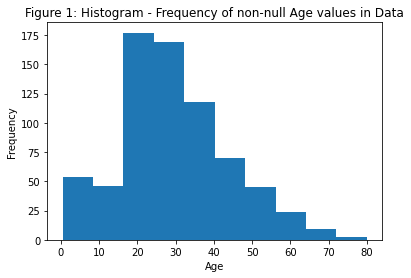

In [212]:
df_age_not_null = df.loc[~df["Age"].isnull()]

counts, bins = np.histogram(df_age_not_null["Age"])
fig1 = plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Figure 1: Histogram - Frequency of non-null Age values in Data")
print("Age Median = ", df_age_not_null["Age"].median())
print("Age Mean = ", df_age_not_null["Age"].mean())
fig1

Looks like the mean and the median aren't too far off from each other, but the data is pretty skewed in the middle;
most of the passengers seem to be between 20 - 30 years old.

Since the data isn't very symmetric and is sort of skewed towards the center, *let's impute with the median age*.

In [213]:
#Impute Age null values with median.
median = df_age_not_null["Age"].median()
df["Age"].fillna(median, inplace = True)

In [214]:
#Sanity Check:
assert(df.Age.isnull().sum() == 0)

###### Embarked Feature
The Embarked feature only has 2 missing values, which is less than 0.3% of the data.
Since it's such a small amount of data (only 2 observations), we can reasonably drop these records without worrying too much
about how it might affect the model.

In [215]:
df_new = df.dropna(subset=["Embarked"])

#Sanity Check
assert(len(df_new) == (len(df) - 2))

df = df_new

###### Cabin Feature
The Cabin feature has 204 missing values. If the two observations that were dropped due to missing in the Embarked Feature were part of this group, then it has 202 missing values. Either way, this accounts for ~23% of the total data.

The Cabin Feature itself has a dtype of Object, because the Cabins are represented as strings, with a combination of digits and numbers, as shown below:

In [216]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24',

It seems illogical to try to impute a cabin number, seeing as though they are pretty specific values. Furthermore, in this domain we can assume that the cabin that the passenger was in may have a strong correlation to their likelihood of survival.

For the sake of argument, let's say we were to remove the Cabin feature all together. Since we can assume that a passenger's cabin most likely corresponded to their socioeconomic class (e.g. higher class probably indicates a passenger was in a more suitable/well-off cabin), let's see if we can derive that similar information from other features.

Hypothesis: There is a correlation between the features Pclass and Fare, as we can assume that a passenger who paid a lot more money for their fare on the Titanic is probably of higher socioeconomic status, and lower fare would indicate a lower socioeonomic status.

Let's see if we can see this hypothesis in a Scatterplot.

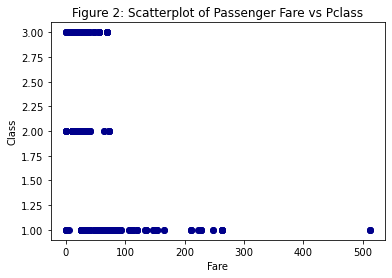

In [217]:
#Scatterplot: Fare vs. PClass
fig2 = plt.scatter(df.Fare, df.Pclass, c = "DarkBlue")
plt.xlabel("Fare")
plt.ylabel("Class")
plt.title("Figure 2: Scatterplot of Passenger Fare vs Pclass")
fig2

It doesn't look like there's any obvious corrolation between Fare and Pclass that might make up any information about the positioning of passengers that we may want to capture in the data.

For now, let's make the null values into their own seperate category, and we'll use feature engineering latter on to let the model use this information, if we still decide to use this feature entirely.

In [218]:
#Impute all np.nan values in the Cabin feature to a new label: "Unknown", for the time being.
df.loc[df['Cabin'].isnull(), "Cabin"] = "Unknown"


Since we've addressed all of the features with missing values/null values, let's take a quick look to make sure we have no more nulls in the data before we move on.

In [219]:
#Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


### Data Munging

Now that we've handled the nulls/missing values in our data, let's move onto data munging.
Here, we'll look at the characteristics of each attribute in the data, and handle any data type conversions, feature engineering, and encoding where necessary.

###### Cabin Feature Engineering and Conversion
Since we know that Cabin may hold some important information about the location of the passengers on the Titanic, let's look at how we can create a suitable feature so that the model can use this information when learning.

Moreover, this attribute has an object data type. For the sake of simplicity and so that we can be sure we give the model useful information only, we should try to convert this attribute to a numeric type (e.g. int64 or float64) for consistency.

In [220]:
#Looking at the values in the Cabin attribute:
df.Cabin.unique()

array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       

With domain knowledge handy, we can perhaps assume that each letter corresponds to perhaps the level or deck of the ship.
For the purposes of modeling, let's feature engineer a new attribute that maps each passenger's Cabin number to a deck level. We'll also keep the "Unknown" level that we imputed in, and map it to a value such as 0 to indicate a lack of information.

In [221]:
#Create new Cabin feature "Deck Level"
deck_mapping = {'A':1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "T":8, "Unknown":0}
df['Cabin_level'] = df['Cabin'].apply(lambda cabin: cabin[0] if cabin != "Unknown" else "Unknown")
df["deck_level"] = df["Cabin_level"].map(deck_mapping)
df.deck_level.unique()

array([0, 3, 5, 7, 4, 1, 2, 6, 8], dtype=int64)

Now, we can finish up by dropping the old Cabin attribute (as well as the copy of it that we made), and ensure that the new feature deck_level is a numeric type!

In [222]:
df.drop('Cabin', axis=1, inplace=True)
df.drop('Cabin_level', axis=1, inplace=True)
assert(df['deck_level'].dtypes == 'int64')

In [223]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,deck_level
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


###### Embarkment Feature Conversion
Similar to the old Cabin attribute, the Embarked attribute is also of type object (string). 
It doesn't have any missing values, but it would be ideal for us to turn this into a numerical feature as well.
Luckily, we can simply map the three unique string values ("S", "C", "Q") that are in this feature to categorical integers as well. 

In [224]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [225]:
embarkment_mapping = {"S":1, "C":2, "Q":3}
df.Embarked = df.Embarked.map(embarkment_mapping)
df.Embarked.unique()

array([1, 2, 3], dtype=int64)

Done!

###### Sex Feature Conversion
One other obvious issue with this data would be the Sex feature, which assigns each passeger either a string value of either "Male" or "Female".

Since we prefer to keep as much data as numeric as possible, let's convert this attribute to a binary indicator, where "Male" will be indicated by 0, and "Female" by 1.

In [226]:
df.loc[df['Sex'] == 'male', 'Sex'] = int(0)
df.loc[df['Sex'] == 'female', 'Sex'] = int(1)
df = df.astype({"Sex": 'int64'})
df.Sex.unique() #sanity check

array([0, 1], dtype=int64)

### Dropping Unnecessary Columns
The remaining "Object" (string) type columns are the attributes Name and Ticket. Let's analyze why we might want to drop either or both of these columns.

###### "Name" attribute
As this is a binary classification task focused on predicting survival, we can use common-sense here combined with domain knowledge to assume that the passenger's name is unlikely to impact their chances of survival, and thus the Name feature will unlikely directly contribute to the outcome.

The name of each passenger is almost guaranteed to be unique to the passenger, and thus will have limited predictive power in terms of their chances of survival.

More over, since each name will assumably be unique, this results in a high cardinality of values; having a feautre with such high cardinality in the model will lead to overfitting, since the model might learn to associate specific names with survival rather than meaningful patterns in the more relevant data.

Thus, let's drop the Name column from the data.

In [227]:
df = df.drop(columns=["Name"])

###### "Ticket" attribute

In [228]:
df.Ticket.unique()[:10]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736'], dtype=object)

Similar to the "Name" attribute, the Ticket attribute consists of alphanumeric vlaues that do not inherently convey any meaningful information. This would make it difficult to extract any meaningful information for the model to use at all. 

Moreover, similar to the "Name" attribute, this attribute is expected to have a very high cardinality, as each passenger was most likely assigned a unique ticket number. Again, high cardinality can lead to overfitting, which we want to avoid.

Let's drop the Ticket column from the data as well.

In [229]:
df = df.drop(columns=["Ticket"])

###### "PassengerId" attribute
Similar to the two attributes above, PassengerID will be unique to the passenger, and will introduce a higher complexity that is most likely unneeded for this prediction task.
Let's drop this attribute as well.

In [230]:
df = df.drop(columns=["PassengerId"])

### Checking for imbalances in the Data
For the reamining attributes, I'll use histograms to see the frequency of values across the dataset.
The histograms used for this analysis are Figures 3 - 10 inclusive, along with the previously created Figure 1.

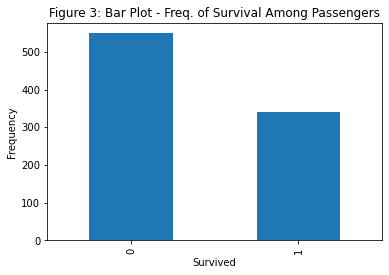

In [231]:
#Survived Attribute    
fig3 = df.Survived.value_counts().plot(kind='bar')
plt.xlabel("Survived")
plt.ylabel("Frequency")
plt.title("Figure 3: Bar Plot - Freq. of Survival Among Passengers")
fig3

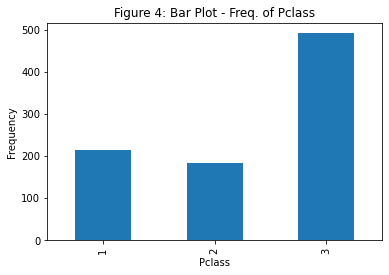

In [232]:
#PClass Attribute    
fig4 = df.Pclass.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Pclass")
plt.ylabel("Frequency")
plt.title("Figure 4: Bar Plot - Freq. of Pclass")
fig4

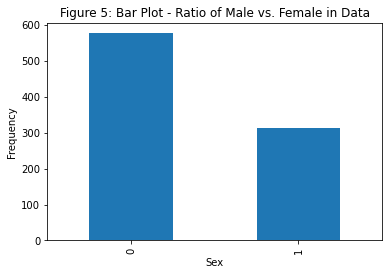

In [233]:
#Sex Attribute    
fig5 = df.Sex.value_counts().plot(kind='bar')
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("Figure 5: Bar Plot - Ratio of Male vs. Female in Data")
fig5

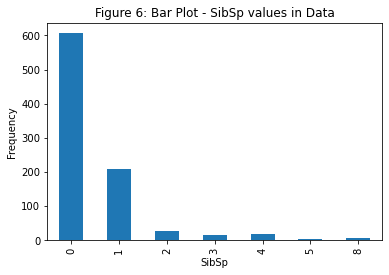

In [234]:
#SibSp Attribute    
fig6 = df.SibSp.value_counts().sort_index().plot(kind='bar')
plt.xlabel("SibSp")
plt.ylabel("Frequency")
plt.title("Figure 6: Bar Plot - SibSp values in Data")
fig6

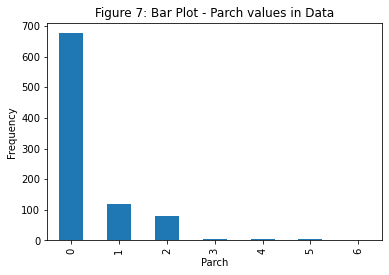

In [235]:
#Parch Attribute    
fig7 = df.Parch.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Parch")
plt.ylabel("Frequency")
plt.title("Figure 7: Bar Plot - Parch values in Data")
fig7

(array([732., 104.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

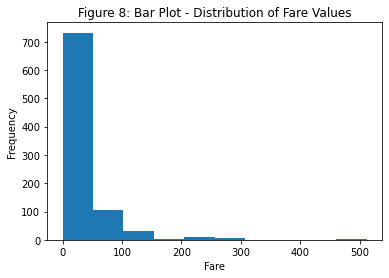

In [236]:
#Fare attribute
counts, bins = np.histogram(df.Fare)
fig8 = plt.hist(bins[:-1], bins, weights = counts)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Figure 8: Bar Plot - Distribution of Fare Values")
fig8

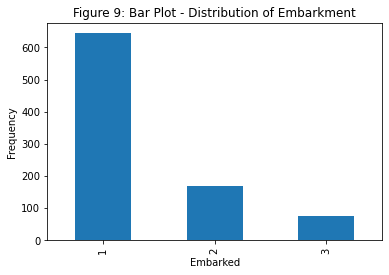

In [237]:
#Embarked Attribute    
fig9 = df.Embarked.value_counts().plot(kind='bar')
plt.xlabel("Embarked")
plt.ylabel("Frequency")
plt.title("Figure 9: Bar Plot - Distribution of Embarkment")
fig9

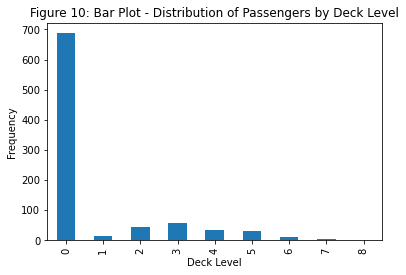

In [238]:
#Deck Level Attribute    
fig10 = df['deck_level'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Deck Level")
plt.ylabel("Frequency")
plt.title("Figure 10: Bar Plot - Distribution of Passengers by Deck Level")
fig10

From a visual analysis of the histograms, we can note a few findings with respect to the data:

1. The target attribute (Survived) is relatively unskewed compared to other attributes, although it's worth noting that according to the historgram, the majority of passengers did not survive, and thus the information that will be available for the model to use to determine whether or not an unseen passenger falls into the "Survived" cateogry is less than that of what is available for it to learn about the "Did Not Survive" category. Thus, I can expect the model may have a potential problem with false negatives with respect to the "Survived" category.

2. The attributes Sex, and Pclass are also slightly skewed, but no expected issues here.

3. The remaining attributes, Sibsp, Parch, Fare, Embarked and deck_level all seem to be either slightly skewed or contain groupings of outliers. Since the majority of outliers are not completely random or small or small in these attributes, it's reasonable to assume that we can leave them in the data to prevent the model from overfitting.

### Data Cleaning Summary (Conclusion and Discussions)
In conclusion, the following data cleaning and data munging steps were conducted:
1. Handling Missing/Null Values in the Data
    1. Three attributes; Age, Embarkment, Cabin were identified as having non-string-typed nulls.
        1. Null values in Age were imputed to the median, as it was noticed that the data was skewed to the ages of 20-30 (see Figure 1)
        2. Only 2 values in Embarked were null values, so those observations were removed from the dataset since they comprised  < 0.5% of the data
        3. Null values in Cabin were imputed to "Unknown", to be used lated for feature engineering.
2. Data Conversions
    1. The Sex attribute was converted from an Object (string) type to a binary indicator, (i.e. "Male" --> 0, "Female" --> 1) for the sake of efficiency.This also maintains the binary nature of this binary classification problem, and allows us to simply the modeling process.
    2. The Embarkment attribute was similarly converted from an Object (string) type to numerical mapping in order to represent th same information but matching the numerical data type of the dataset.

3. Removing Unnecessary Attributes
    1. Both the "Name" and "Ticket" attribute was dropped as it was determined that neither of these attributes would contribute any predictive power/information to the model relevant to survivorship, and due to the high complexity (i.e. every passenger will have a unique name and Ticket number).
    2. Similarly, the PassengerID attribute was removed due to irrelevance -- it acted as an index for the dataset, and would've introduced an unnessecary high-dimensional attribute to the model while providing little predictive power.
    
##### Visualizations
To aid in the data cleaning step, I created 2 seperate visualizations as shown above:
1. Figure 1: Histogram of Age vs. Frequency in the Data
    1. Purpose: Determine imbalances in the Age attribute in order to decide which method to use for missing value imputation
2. Figure 2: Scatterplot of Fare vs. Pclass
    1. Purpose: To analyze whether or not there was an obvious relation between the two features that may indicate socioeconomic status relative to positioning on the ship to justify potentially removing the Cabin attribute entirely.
3. Figures 3 - 10: Bar Plots
    1. Figures 3 - 10 were used to visually inspect the data for any skewing, imbalances, or outliers. 
    
Finally, now that we've completed the Data Cleaning portion of this project, we can use df.info() to see that all data types of all attributes are numeric (int or float).

We now have a datast with nine (9) columns/attributes, and 889 observations.

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    int64  
 3   Age         889 non-null    float64
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Embarked    889 non-null    int64  
 8   deck_level  889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


## Exploratory Data Analysis (EDA)
Now that we've completed Data Cleaning, and we've gotten some sense of what the distribution of data looks like, let's begin EDA.
We'll execute the following steps for a complete analysis:
1. Analyze Summary Statistics
2. Simple Data Visualization (including a correlation matrix)
3. Statistical Testing (using the Mann-Whitney U test)
4. EDA Summary/Conclusion

### 1. Analysis of Summary Statistics
In this step, we'll use the summary statistics of all attributes to analyze the central tendencies, spread and distribution. Our interpretations here should support what we noted in Figures 1 - 10 earlier.

In [240]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,deck_level
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.350956,29.315152,0.524184,0.382452,32.096681,1.362205,0.773903
std,0.486260,0.834700,0.477538,12.984932,1.103705,0.806761,49.697504,0.636157,1.591629
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,8.000000


###### Survived Attribute
- Since 0 = Did Not Survive and 1 = Survived for this feature which implies that only 38.25% of the passengers survived. This suggests that the data is imbalanced, with a larger population of non-survivors.
- We can tell that the distribution of "Survived" is imbalanced towards non-survivors.

###### PClass Attribute
- Since this is a categorial numerical indicator, the describe function isn't very useful here. From our earlier bar plot (Figure 4), we know that the majority of passengers were in class 3 (lower class), with less in classes 1 and 2.

###### Sex Attribute
- Since this is a categorial numerical indicator, the describe function isn't very useful here.
- We know from our earlier bar plot (Fig 5) that there were more male passengers than female passengers (~51% to 39%)

###### Age Attribute
- As we noticed in our earlier histogram (Fig1), it's obvious that the average age is ~ 29 years old.
- The minimum age of 0.42 suggets there are indants within the dataset, which we know to be true (it's noted that infants younger than 1 years old were denoted with fractional ages).
- The oldest passenger in the dataset was 80 years old (as denoted by max)
- The percentiles indicate that 25% of passengers were 22 years or younger, 50% of passengers were 28 years old or younger, and at least 75% of passengers were 35 years old or younger.
- The data clearly covers a wide range of ages, from infants to the elderly.

###### Sibsp Attribute
- With a mean of 0.524184, we can conclude that on average, passengers either had 1 or no siblings or spouses aboard with them. Moreover, the small standard deviation (1.103) implies low variability in the number of siblings or spouses: the majority of people had between 0 siblings or spouses, or ~2 siblings or spouses with them. (0.524184 +- 1.103). 
- It's worth noting here again that fiances and mistresses were ignored in this data attribute, so this segment of the data might have underlying missing data.
- The maximum number of sibligs and/or spouses in this dataset is 8 (perhaps a family with 8 children?).

###### Parch Attribute
- The dataset contains passengers with a rnage of numbers of parents or children abroad, from none to a maximum of 8.
- The mean indicates that the majority of passengers did not have any parents or children abroad.
- The mean value of ~0.38 is less than the median (0.0), indicating a positively skewed distribution with more passengers having fewer parents or children.

###### Fare Attribute
- The data contains a wide range of fare values, from free (0 dollars) fare to high-priced tickets.
- The average price paid by a passenger was ~32 dollars, as depicted by the mean, but this is clearly skewed, as the 75% percentile tells us that at least 75% of passengers paid a fare of 31 dollars or lower.
- The median (50% percentile) of ~14.45 is lower than the mean, confirming the above point by suggting a skewed distribution with more passengers purchasing lower-priced tickets.
- How could a passenger pay a Fare of 0.0? Perhaps they were with a spouse/family member who paid the fare for both of them, or they were a crew member? This might be worth looking into!
- It may also be worth looking into Fare vs. PClass closer than we did before, or perhaps looking into Fare vs. Deck Level to see if we can see any patterns in this attribute.

###### Embarked Attribute
- The percentiles here tell us that at least half of the passengers embarked at Port 1 - Southampton.
- The numerical encoding here represts categorical port values, so this statistical analysis won't give us much information.

###### Deck_Level Attribute
- Since the deck levels have been encoded into numerical values and this is a categorical scheme, the values in this summary are not directly interpretable. 
- However, as we saw in Figure 10, the majority of passengers had an "Unknown" deck level in this encoding scheme. 
- It might be worthwhile to see if there's any relation between deck_level and survivorship to determine whether or not this attribute will be useful to the prediction, otherwise it may just be introducing noise.


### 2. Simple Data Visualization

__Bar Plots__

In this section, we'll analyze the data further through the simple plots that we generated earlier and a correlation matrix.
As part of data cleaning, I already generated bar plots/histograms for each of the attributes and did an analysis in the Data Cleaning Step. Please refer to that section (i.e. Data > Cleaning > Checking For Imbalances in the Data).


__Correlation Matrix__

Let's create a correlation matrix to see if we can determine the magnitude of correlation between features and the target attribute. We'll create it as a heatmap using Matplotlib and Seaborn so that we can see the correlations easier.

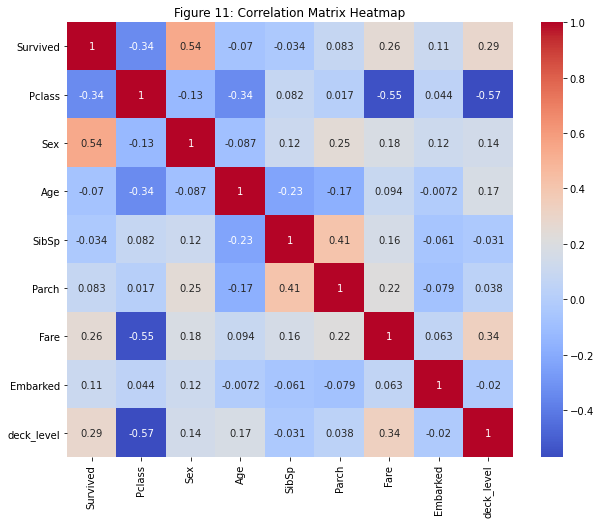

In [241]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Figure 11: Correlation Matrix Heatmap")
plt.show()

__Correlation Matrix Analysis__

1. It seems that there's not much correlation between the target and the given features/attributes.
2. The stronest postive, linear relationship to the target appears to be Sex (at 0.54 correlation), and the strongest negative linear correlation is Pclass (-0.34).
    1. I therefore expect Pclass and Sex to have the highest feature importance in the model.
3. deck_level and Fare have close to 0 correlation, indicating little to no linear relationship to the target variable.
    1. Thus, I also expect these two features to have the lowest feature importance in the model.
4. From reading this matrix, I also assume that the model might have trouble picking up signal from these attributes, and thus may have trouble learning the underlying patterns of the data. I expect underfitting to occur (before any ajustments are made).

Some further notes:

- The assumtion that deck_level would be correlated with Pclass is correct, it has a strong negative linear correlation.
- Similarly, the Fare attribute has a stronger negative correlation to Pclass as well. From this note and the point above, we can probably assume that Pclass can be determined by some combination of Fare and deck_level.
- It is also worth noting that deck_level has minimal correlation with Fare, which is unintuitive, but understandable when we recall that the category that occurs the most in deck_level is the "Unknown" category.

### 4. Statistical Testing (using the Mann-Whitney U test)
As a final statistical test, let's analyze the statistical significance of our features, and ensure that they align with our understanding of the data so far.

A regular p-test analysis may be unsable, since we know that our data is not normally distributed and imbalanced/skewed in areas.

Instead, let's use the Mann-Whitney U test. This is a similar test that allows us to derive a p-value when the distribution of data of two groups (in our case, Survived or Not Survived) is not equal across the data. This will ensure a slightly higher accuracy in our resulting p-values, relative to our actual data distribution.

We'll use the usual p<0.05 threshold to determine significance level.

This test is included in the scipy.stats module: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [242]:
#Perform Mann-Whitney U test
significance = 0.05 #Significance Level


def MannWhitneyU(df, significance, Target_feature, test_features):
    df_MannWhitneyU_results = pd.DataFrame(columns=['Attribute', "p_value", 'Mann-Whitney U statistic', 'Significance'])
    
    attributes = []
    p_values = []
    MWU_stat = []
    Signif = []
    
    for feature in test_features:
        data1 = df[df[Target_feature] == 1][feature]
        data2 = df[df[Target_feature] == 0][feature]
        
        statistic, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
        
        attributes.append(feature)
        p_values.append(p_value)
        MWU_stat.append(statistic)
        
        if p_value < significance:
            Signif.append("Y")
        else:
            Signif.append("N")
    
    df_MannWhitneyU_results['Attribute'] = attributes
    df_MannWhitneyU_results["p_value"] = p_values
    df_MannWhitneyU_results['Mann-Whitney U statistic'] = MWU_stat
    df_MannWhitneyU_results['Significance'] = Signif
                
    return df_MannWhitneyU_results

features = df.columns[1:]
MWU_test = MannWhitneyU(df, 0.05, "Survived", list(features))
print("Figure 12: Results of Mann-Whitney U Test Statistical Analysis")
MWU_test

Figure 12: Results of Mann-Whitney U Test Statistical Analysis


,Attribute,p_value,Mann-Whitney U statistic,Significance
0,Pclass,1.019408e-23,59736.5,Y
1,Sex,1.363739e-58,142969.5,Y
2,Age,2.215368e-01,88808.5,N
3,SibSp,6.730256e-03,101585.0,Y
4,Parch,2.973458e-05,104928.0,Y
5,Fare,1.192977e-21,128887.5,Y
6,Embarked,3.986990e-05,105293.0,Y
7,deck_level,1.094546e-20,118783.0,Y


__Mann-Whitney U Test Results Analysis__

Based on the Mann-Whitney U test, it appears that the only non-significant feature in the data is Age. This implies that there is no statistically significant difference in the distribution of "Age" between the "Survived" and "Not Survived" groups.

*Does this mean that we should drop it from the model?*

The lack of statistical significance doesn't mean that the Age feature will be completely useless. From our correlation matrix (Figure 11), we can see that it has negative linear correlations with some other features, and it's thus possible that age may still have an effect on the model's learning when in combination with other features.

With that in mind, we also have a limited dataset size (<900 observations) from the model to learn from, so dropping this feature might make us lose more information than we intend. 

For now, let's keep Age in the dataset and see how the model handles it.



### 4. EDA Summary

In conclusions, we've performed the following steps for the EDA analysis:

1. Analyzed the data summary statistics to get a more numerical sense of basics of the distribution, central tendency and spread of the data.
2. Categorical plots (histograms/bar charts) for each feature to visually inspect the imbalances and distributions across the data (specifically for categorical features).
2. Created a Correlation Matrix to see linear correlations between all the features in the data.
3. Conducted a Mann-Whitney U test to see statistical significance of each feature relative to the target.

Let's move on to modeling!

## Modeling Phase

Now that we've completed the EDA phase and we better understand the data, let's go ahead and create our models.

__Choice of models and justifications__

We'll be creating two models: a Logistic Regression model and a Random Forest model.

**Why the Logistic Regression Model?**

- Logistic regression models the probability of the outcome (i.e. Survivorship) as a function of the predictor values (i.e. attributes), and uses the logistic function to map the probability to the range [0,1]. Thus, it's perfect for this Binary Classification Task where we need do predict the output variable that is discrete in two classes (Survived or Not Survived).

**Why the Random Forest Model**

- Random Forest is an ensemble learning model that is particularly useful when dealing with datasets that have a mix of categorical and numerical features, like we do in this dataset. It can capture complex relationships between features and target, which we may have missed in the EDA step. It also handles non-linearities well, which may not have been obvious while perfoming EDA.

Together, the Logistic Regression Model can act as a baseline model by the nature of its simplicity, whereas the Random Forest Model will act as the more advanced approach by combining multiple decision trees for improved performance. 




#### Modeling Data Preparation
First, we'll split the data into two folds: training data and test data. We'll use 20% of the data for testing.

In [243]:
features = df.iloc[: , 1:]
target = df[df.columns[:1]]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

We'll also standardize the features to be sure that the features are on a similar scale.

In [244]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Creating and Training Logistic Regression Model (using SMOTE)
We'll use SMOTE to over sample the minority class to help mitigate the data imbalance we observed earlier in EDA and Data Cleaning.


In [245]:
#Apply smote to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Create and train the Logistic Regression model
model = LogisticRegression().fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

C:\Users\alana\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [246]:
#Print Accuracy and Predictions
print("Accuracy:", accuracy)

Accuracy: 0.7921348314606742


### Creating and Training Random Forest Model (using SMOTE and Cross-Validation)
We'll use SMOTE and Cross-Validation for this model to address the data imbalance and assess the generalization of the model more effectively. We'll use 5 folds for cross validation, which is usually pretty standard.

In [247]:
scalar = StandardScaler()
X_scaled = scaler.fit_transform(features)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, target)

# Create and train the Random Forest model with cross-validation
rf_model = RandomForestClassifier(random_state=42)
rf_predictions = cross_val_predict(rf_model, X_resampled, y_resampled, cv=5)  # Perform 5-fold cross-validation
cross_val_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5)  # Use 5-fold cross-validation

# Calculate mean and standard deviation of cross-validation scores
mean_accuracy = cross_val_scores.mean()
std_accuracy = cross_val_scores.std()

C:\Users\alana\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\alana\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\alana\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\alana\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [248]:
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Cross-Validation Scores: [0.76363636 0.81818182 0.82272727 0.85388128 0.84018265]
Mean Accuracy: 0.8197218762972188
Standard Deviation of Accuracy: 0.03079771703795994


### Modeling Phase Summary and Continuing Analysis

We've created TWO ML Models for this binary classification problem (A Logistic Regression Model and a Random Forest Model), that utilize feature engineering (in the case of deck_level), and use standardization of feautres, as well as SMOTE and cross-validation!


Now, we can go ahead and analyze our results.

We'll tackle this by analyzing the model in a few ways:
1. Accuracy and Cross-Validation Scores
2. Precision, Recall and F1-Score (useful for imbalanced datasets)

#### Accuracy and Cross-Validation Scores
Let's compare the accuracy scores for both models, and then look at the cross-validation score for the Random Forest Model

Text(0.5, 1.0, 'Figure 13: Logistic Regression vs. Random Forest Accuracy Scores Bar Plot')

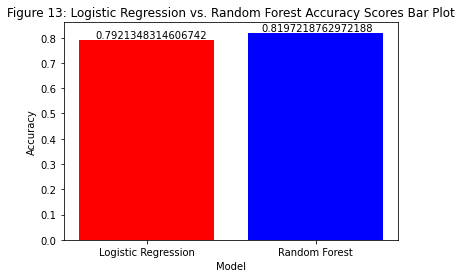

In [249]:
lr_accuracy = accuracy
rf_accuracy = mean_accuracy

model_names = ["Logistic Regression", "Random Forest"]
plt.bar(model_names, [lr_accuracy, rf_accuracy], color=["red", "blue"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.text(-0.3,0.8, str(lr_accuracy))
plt.text(0.68,0.825, str(rf_accuracy))

plt.title("Figure 13: Logistic Regression vs. Random Forest Accuracy Scores Bar Plot")

From Figure 13, we can see that the Random Forest model outperforms the Logistic Regression model in raw scored accuracy.

Let's take a look at the cross-validation accuracy scores of Random Forest.

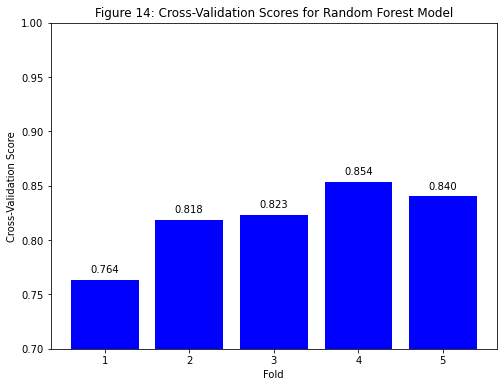

In [250]:
# Create a bar plot to visualize the cross-validation scores
plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(cross_val_scores) + 1), cross_val_scores, color='blue')
plt.xlabel('Fold')
plt.ylabel('Cross-Validation Score')
plt.title('Figure 14: Cross-Validation Scores for Random Forest Model')
plt.xticks(range(1, len(cross_val_scores) + 1))
plt.ylim(0.7, 1.0)  # Adjust y-axis limits as needed
for bar, score in zip(bars, cross_val_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{score:.3f}', ha='center', va='bottom')

plt.show()

With only 5 folds, we can see a consistency in the accuracy (e.g. the mean accuracy +- standard deviation), which indicates better performance overall, and the fourth fold yielded the highest accuracy.

#### Precision, Recall and F1-Score
Let's take a look at some more metrics, the precision, recall and f1-scores for both models, as these are useful to look at when we know we're working with imbalanced data.

In [251]:
lr_precision = precision_score(y_test, predictions)
lr_recall = recall_score(y_test, predictions)
lr_f1 = f1_score(y_test, predictions)

rf_precision = precision_score(y_resampled, rf_predictions)
rf_recall = recall_score(y_resampled, rf_predictions)
rf_f1 = f1_score(y_resampled, rf_predictions)

metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Precision": [lr_precision, rf_precision],
    "Recall_Scores": [lr_recall, rf_recall],
    "F1 Scores": [lr_f1, rf_f1]
})
print("Figure 15: Table of Precision, Recall and F1 scores for each model")
metrics

Figure 15: Table of Precision, Recall and F1 scores for each model


,Model,Precision,Recall_Scores,F1 Scores
0,Logistic Regression,0.695122,0.826087,0.754967
1,Random Forest,0.824399,0.812386,0.818349


As expected, the Random Forest Model has a higher precision score, and a comparable Recall score, implying that it generally
postively identifies Survivors better than the Logistic Regression model.

Furthermore, noting the Random Forest's recall score alonside the precision score tells us that it generally doesn't make false positive errors, compared to the Logistic Regression model.

Moreover, we can see this hypothesis confirmed in the F1 score, where the Random Forest has a higher F1. This implies that the model has a generally high precision and recall, and is achieving a better trade-off between precision and recall in its predictions compared to the Logistic Regression model.


### Discussion and Conclusion

In conclusion, this project was somewhat of a success, and from it I've gatehered learnings and takeaways, gained an understanding as to why performance was not stellar, and determined some ways to improve.

**Learnings and Takeaways**

- Data Preparation is key to accurate modeling. Handling missing values correctly is important, as is differentiating between categorical and numerical features. Feature engineering can really make or break the learning process as well!
- It's not just the size of the dataset that can impact perforamnce; imbalances in the data provided can change your model, and technqiues like SMOTE can help adress this. 
- There is a tradeoff between too much data preprocessing/cleaning, and not enough. 

**New insights and understandings**

- Handling the imbalance in data is important, and is most likely why the accuracy of these models wasn't increadibly high.
- One reason for relatively low accuracy in the models may be the prescence of noisy or irrelevant features (perhaps Age really wasn't that important after all?), and it's important to dive into these feautres entirely before making the final selection.
- Moreover, using metrics like precision, recall and F1-score are necessary to evaluate model performance, especially with data imbalance in the mix. 

**Methods for improvement**

- For a more robust version of the Logistic Regression model, I could introduce cross-validation as well, which would ultimately yield to a better comparison against the Random Forest Model.
- For the Logistic Regression Model, I could also try other types of regression to prevent overfitting and improve generalization (such as Elastic Net), which may greatly improve performance.
- To improve on both of the models, I could take the Feature Importance approach and use select features per model. Just because data is in the data set, doesn't mean that I need to make use of it!
- Next time, I could experiment with hyperparameter tuning on both models, by using methods like Grid Search to determine those factors.